In [1]:
import pandas as pd
import numpy as np
import pickle
from collections import defaultdict, Counter
pd.options.display.max_columns = 99
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [2]:
from pattern.en import lemma
def Tokenizer(word):
    def get_rid_of_apostrophe(s):
        if s[-3:] == "in'":
            s = s[:-3] + "ing"
        if s[-2:] == "'s" or s[-2:] == "''":
            s = s[:-2]
        if s[-1:] == "'":
            s = s[:-1]
        return s
    temp = lemma(get_rid_of_apostrophe(word))
    while lemma(get_rid_of_apostrophe(temp)) != temp:
        temp = lemma(get_rid_of_apostrophe(temp))
    return temp

In [3]:
emotions = pd.read_csv("../data/NRC-Emotion-Lexicon-Wordlevel-v0.92.txt", delimiter='\t', header=None)
emotions.columns = ["word", "emotion", "True"]

In [4]:
emotion_categories = list(np.unique(emotions["emotion"]))

In [5]:
emotions_wide = pd.DataFrame(emotions.pivot(index='word', columns='emotion', values='True')).reset_index()

In [6]:
emotions_wide = emotions_wide.dropna()

In [7]:
emotions_wide["word"] = [Tokenizer(i) for i in emotions_wide["word"]]

In [8]:
emotions_wide = pd.DataFrame(emotions_wide.groupby("word").agg(lambda x: 1 if 1 in x.values else 0)).reset_index()

In [9]:
emotions_wide.head()

emotion,word,anger,anticipation,disgust,fear,joy,negative,positive,sadness,surprise,trust
0,a,0,0,0,0,0,1,0,0,0,0
1,aback,0,0,0,0,0,0,0,0,0,0
2,abacu,0,0,0,0,0,0,0,0,0,1
3,abandon,1,0,0,1,0,1,0,1,0,0
4,abandonment,1,0,0,1,0,1,0,1,1,0


In [10]:
stopwords_file = open("../data/stopwords.txt", 'r')
stopwords = [Tokenizer(i.strip()) for i in stopwords_file.readlines()]
stopwords.append("feel")
stopwords_file.close()

In [11]:
song_lyrics = pickle.load(open("../data/pickle/FinalData/df_concat.pickle", "rb"))
bag_of_words = pickle.load(open("../data/pickle/FinalData/bag_of_words_concat.pickle", "rb"))

In [12]:
overlap_words = pd.DataFrame(bag_of_words.merge(emotions_wide, left_on = "word", right_on="word", how="inner"))

In [13]:
overlap_words = overlap_words[(overlap_words["songcount"]) >= 50 & (~overlap_words["word"].isin(stopwords))]

In [14]:
overlap_words.shape

(8868, 13)

In [15]:
emotion_bag_set = defaultdict(set)
for c in emotion_categories:
    emotion_bag_set[c] = set([i for i,j in zip(emotions_wide["word"], emotions_wide[c]) if j ==1 ])

In [16]:
song_lyrics.head()

,song,artist,genius_raw,genius_bag,az_lyrics_raw,az_lyrics_bag,lyrics_az_raw,lyrics_az_bag,GvAZL,GvLAZ,AZLvLAZ,genius_counter,az_lyrics_counter,lyrics_az_counter,word_intersect,word_intersect_counter
0,sauce it up,lil uzi vert,"[Intro]\nSauce it up, ayy, sauce it up, ayy\nS...","[sauce, it, up, ayy, sauce, it, up, ayy, sauce...","Sauce it up, ayy, sauce it up, ayy<br>\nSauce ...","[sauce, it, up, ayy, sauce, it, up, ayy, sauce...",[Intro]<br />\nSauce it up (aye)<br />\nSauce ...,"[sauce, it, up, aye, sauce, it, up, aye, sauce...",0.981573,0.852666,0.864487,"{'sauce': 18, 'it': 32, 'up': 36, 'ayy': 7, 'g...","{'sauce': 18, 'it': 32, 'up': 36, 'ayy': 7, 'i...","{'sauce': 12, 'it': 28, 'up': 24, 'aye': 6, 'g...","[let, okay, say, on, harley, brrr, woo, cardi,...","{'let': 2.0, 'okay': 1.0, 'say': 2.0, 'on': 4...."
1,backroad song,granger smith,Barbed wire fence carving out a hillside\nCutt...,"[barb, wire, fence, carve, out, a, hillside, c...","Barbed wire fence carving out a hillside, cutt...","[barb, wire, fence, carve, out, a, hillside, c...","Barbed wire fence carving out a hillside, cutt...","[barb, wire, fence, carve, out, a, hillside, c...",0.996372,0.997579,0.998789,"{'barb': 1, 'wire': 1, 'fence': 1, 'carve': 1,...","{'barb': 1, 'wire': 1, 'fence': 1, 'carve': 1,...","{'barb': 1, 'wire': 1, 'fence': 1, 'carve': 1,...","[let, feel, we're, today, grey, on, song, hear...","{'let': 1.0, 'feel': 11.0, 'we're': 1.0, 'toda..."
2,feelin' satisfied,boston,[Verse 1]\nWell come on\nAll you people\nThe t...,"[well, come, on, all, you, people, the, time, ...",Well come on<br>\nAll you people<br>\nThe time...,"[well, come, on, all, you, people, the, time, ...",Well come on<br />\nAll you people<br />\nThe ...,"[well, come, on, all, you, people, the, time, ...",0.949709,0.946203,0.996477,"{'well': 2, 'come': 9, 'on': 9, 'all': 1, 'you...","{'well': 2, 'come': 10, 'on': 11, 'all': 1, 'y...","{'well': 2, 'come': 10, 'on': 11, 'all': 1, 'y...","[people, let, can, alright, satisfy, feel, giv...","{'people': 1.0, 'let': 8.0, 'can': 2.0, 'alrig..."
3,saturday morning confusion,bobby russell,"Here they come, warming up\nI hear the pitter ...","[here, they, come, warm, up, i, hear, the, pit...",None,None,"Here they come, warming up<br />\nI hear the p...","[here, they, come, warm, up, i, hear, the, pit...",0.000000,0.999033,0.000000,"{'here': 3, 'they': 3, 'come': 3, 'warm': 2, '...",{},"{'here': 3, 'they': 3, 'come': 3, 'warm': 2, '...","[let, feel, dog, today, how, hear, on, come, r...","{'let': 2.0, 'feel': 1.0, 'dog': 4.0, 'today':..."
4,country man,luke bryan,"[Verse 1]\nYou need hands, rough not soft\nTo ...","[you, need, hand, rough, not, soft, to, come, ...","You need hands, rough not soft<br>\nTo come an...","[you, need, hand, rough, not, soft, to, come, ...","You need hands, rough not soft<br />\nTo come ...","[you, need, hand, rough, not, soft, to, come, ...",0.971121,0.967205,0.991220,"{'you': 7, 'need': 1, 'hand': 2, 'rough': 1, '...","{'you': 7, 'need': 1, 'hand': 2, 'rough': 1, '...","{'you': 7, 'need': 1, 'hand': 2, 'rough': 1, '...","[let, gator, tenni, move, come, way, muscle, t...","{'let': 1.0, 'gator': 1.0, 'tenni': 1.0, 'move..."


In [17]:
# Use Existence 
for c in emotion_categories:
    song_lyrics[c] = [len(set(word_intersect).intersection(emotion_bag_set[c]))
                      for word_intersect_counter, word_intersect in zip(song_lyrics["word_intersect_counter"], song_lyrics["word_intersect"])]     
    song_lyrics["{}_bag".format(c)] = [list(set(word_intersect).intersection(emotion_bag_set[c]))
                                      for word_intersect_counter, word_intersect in zip(song_lyrics["word_intersect_counter"], song_lyrics["word_intersect"])]  

In [54]:
# Use word count
for c in emotion_categories:
    song_lyrics[c] = [int(np.sum([word_intersect_counter[i] for i in list(set(word_intersect).intersection(emotion_bag_set[c]))])) 
                      for word_intersect_counter, word_intersect in zip(song_lyrics["word_intersect_counter"], song_lyrics["word_intersect"])]   
    song_lyrics["{}_bag".format(c)] = [list(set(word_intersect).intersection(emotion_bag_set[c]))
                                      for word_intersect_counter, word_intersect in zip(song_lyrics["word_intersect_counter"], song_lyrics["word_intersect"])]  

In [18]:
song_lyrics["word_count"] = [np.sum(i) for i in song_lyrics[emotion_categories].values]

In [19]:
all_category_words = defaultdict(Counter)
for c in emotion_categories:
    all_category_words[c] = Counter([j for i in song_lyrics["{}_bag".format(c)].values for j in i])

In [20]:
def word_cloud_from_cluster(c):
    print(c)
    df = all_category_words[c]
    wc = WordCloud(width=900,height=500, max_words=1628,relative_scaling=1,normalize_plurals=False).generate_from_frequencies({k:df[k] for k in df if df[k]>0 and k not in stopwords})
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    plt.show()

anger


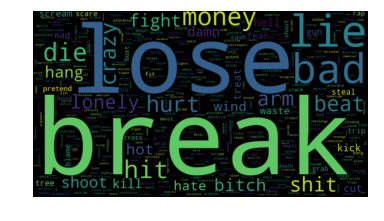

anticipation


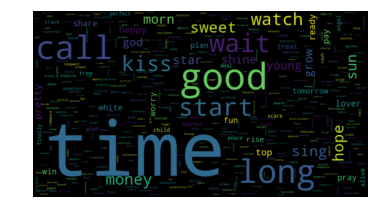

disgust


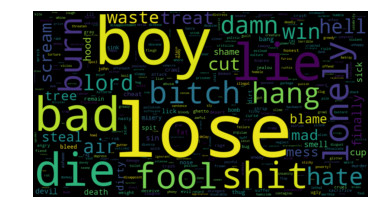

fear


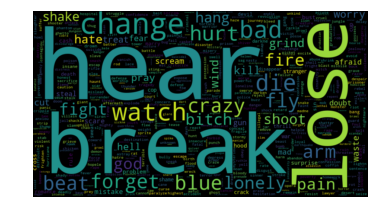

joy


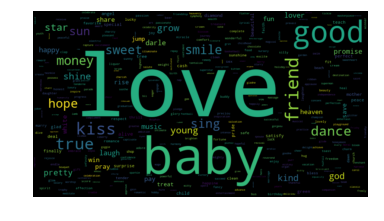

negative


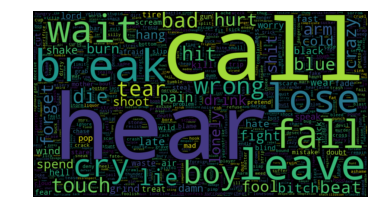

positive


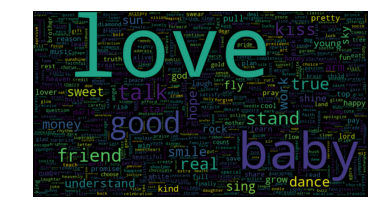

sadness


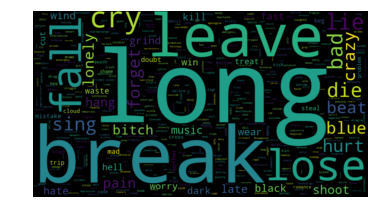

surprise


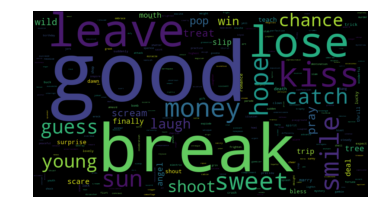

trust


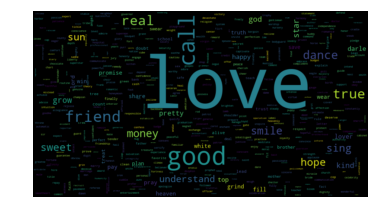

In [21]:
for c in emotion_categories:
    word_cloud_from_cluster(c)

In [22]:
song_lyrics.head()

,song,artist,genius_raw,genius_bag,az_lyrics_raw,az_lyrics_bag,lyrics_az_raw,lyrics_az_bag,GvAZL,GvLAZ,AZLvLAZ,genius_counter,az_lyrics_counter,lyrics_az_counter,word_intersect,word_intersect_counter,anger,anger_bag,anticipation,anticipation_bag,disgust,disgust_bag,fear,fear_bag,joy,joy_bag,negative,negative_bag,positive,positive_bag,sadness,sadness_bag,surprise,surprise_bag,trust,trust_bag,word_count
0,sauce it up,lil uzi vert,"[Intro]\nSauce it up, ayy, sauce it up, ayy\nS...","[sauce, it, up, ayy, sauce, it, up, ayy, sauce...","Sauce it up, ayy, sauce it up, ayy<br>\nSauce ...","[sauce, it, up, ayy, sauce, it, up, ayy, sauce...",[Intro]<br />\nSauce it up (aye)<br />\nSauce ...,"[sauce, it, up, aye, sauce, it, up, aye, sauce...",0.981573,0.852666,0.864487,"{'sauce': 18, 'it': 32, 'up': 36, 'ayy': 7, 'g...","{'sauce': 18, 'it': 32, 'up': 36, 'ayy': 7, 'i...","{'sauce': 12, 'it': 28, 'up': 24, 'aye': 6, 'g...","[let, okay, say, on, harley, brrr, woo, cardi,...","{'let': 2.0, 'okay': 1.0, 'say': 2.0, 'on': 4....",7,"[hurt, bitch, money, shit, cash, bad, hate]",8,"[think, call, money, time, score, warn, cash, ...",5,"[boy, bitch, shit, bad, hate]",8,"[hurt, bitch, swerve, warn, cash, bad, flu, hate]",8,"[love, diamond, lamb, baby, money, score, cash...",17,"[call, exhaust, chase, serve, hurt, boy, rug, ...",11,"[love, diamond, lamb, important, baby, money, ...",5,"[exhaust, hurt, bitch, bad, hate]",5,"[money, swerve, score, warn, catch]",10,"[call, love, lamb, cash, important, money, swe...",84
1,backroad song,granger smith,Barbed wire fence carving out a hillside\nCutt...,"[barb, wire, fence, carve, out, a, hillside, c...","Barbed wire fence carving out a hillside, cutt...","[barb, wire, fence, carve, out, a, hillside, c...","Barbed wire fence carving out a hillside, cutt...","[barb, wire, fence, carve, out, a, hillside, c...",0.996372,0.997579,0.998789,"{'barb': 1, 'wire': 1, 'fence': 1, 'carve': 1,...","{'barb': 1, 'wire': 1, 'fence': 1, 'carve': 1,...","{'barb': 1, 'wire': 1, 'fence': 1, 'carve': 1,...","[let, feel, we're, today, grey, on, song, hear...","{'let': 1.0, 'feel': 11.0, 'we're': 1.0, 'toda...",6,"[cut, hit, smell, feel, barb, fence]",5,"[think, feel, sun, come, sing]",3,"[cut, smell, feel]",4,"[cut, line, hear, feel]",7,"[love, hug, feel, sun, freedom, like, sing]",8,"[cut, hear, hit, dust, smell, feel, a, barb]",10,"[love, radio, rhythm, hug, pick, feel, sun, fr...",3,"[cut, sing, feel]",2,"[sun, feel]",9,"[love, truck, hug, cover, feel, sun, freedom, ...",57
2,feelin' satisfied,boston,[Verse 1]\nWell come on\nAll you people\nThe t...,"[well, come, on, all, you, people, the, time, ...",Well come on<br>\nAll you people<br>\nThe time...,"[well, come, on, all, you, people, the, time, ...",Well come on<br />\nAll you people<br />\nThe ...,"[well, come, on, all, you, people, the, time, ...",0.949709,0.946203,0.996477,"{'well': 2, 'come': 9, 'on': 9, 'all': 1, 'you...","{'well': 2, 'come': 10, 'on': 11, 'all': 1, 'y...","{'well': 2, 'come': 10, 'on': 11, 'all': 1, 'y...","[people, let, can, alright, satisfy, feel, giv...","{'people': 1.0, 'let': 8.0, 'can': 2.0, 'alrig...",2,"[lose, feel]",5,"[feel, time, ready, come, win]",3,"[lose, win, feel]",3,"[lose, feel, stormy]",5,"[like, music, feel, satisfy, win]",4,"[lose, a, feel, stormy]",8,"[like, music, feel, rock, know, satisfy, give,...",4,"[lose, win, music, feel]",4,"[lose, win, chance, feel]",3,"[win, like, feel]",41
3,saturday morning confusion,bobby russell,"Here they come, warming up\nI hear the pitter ...","[here, they, come, warm, up, i, hear, the, pit...",None,None,"Here they come, warming up<br />\nI hear the p...","[here, they, come, warm, up, i, hear, the, pit...",0.000000,0.999033,0.000000,"{'here': 3, 'they': 3, 'come': 3, 'warm': 2, '...",{},"{'here': 3, 'they': 3, 'come': 3, 'warm': 2, '...","[let, feel, dog, today, how, hear, on, come, r...","{'let': 2.0, 'feel': 1.0, 'dog': 4.0, 'today':...",12,"[hang, confusion, tree, harry, grab, yell, tol...",13,

In [29]:
nrc_song_lyrics = song_lyrics[["song", "artist"] + emotion_categories + ["word_count"]]

In [30]:
nrc_song_lyrics.head()

,song,artist,anger,anticipation,disgust,fear,joy,negative,positive,sadness,surprise,trust,word_count
0,sauce it up,lil uzi vert,7,8,5,8,8,17,11,5,5,10,84
1,backroad song,granger smith,6,5,3,4,7,8,10,3,2,9,57
2,feelin' satisfied,boston,2,5,3,3,5,4,8,4,4,3,41
3,saturday morning confusion,bobby russell,12,13,9,11,10,26,19,9,10,13,132
4,country man,luke bryan,4,6,3,2,7,8,11,0,3,7,51


In [31]:
nrc_song_lyrics.to_csv("../data/nrc_song_lyrics.csv")